LOGISTIC REGRESSION
1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.
Detailed deployment instructions are available in the Streamlit Documentation.
https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app

Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?



# 1. Data Exploration

In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')


In [2]:
# Examine the structure
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# Summary statistics
print(train_data.describe(include='all'))


        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

Visualizations

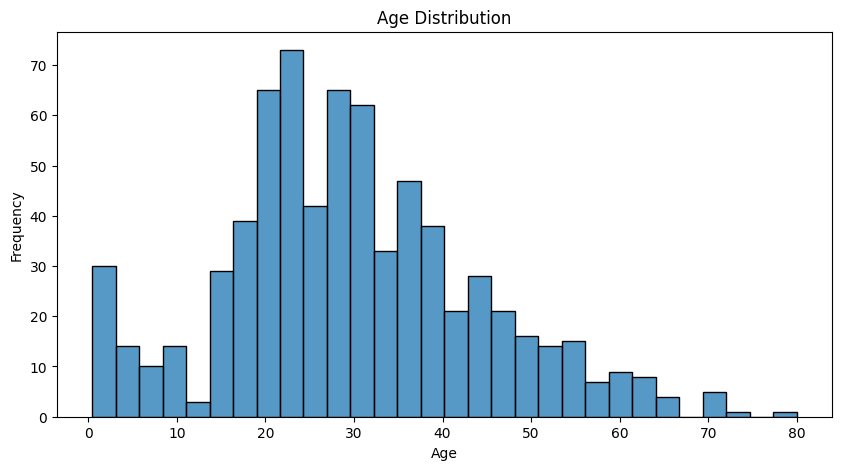

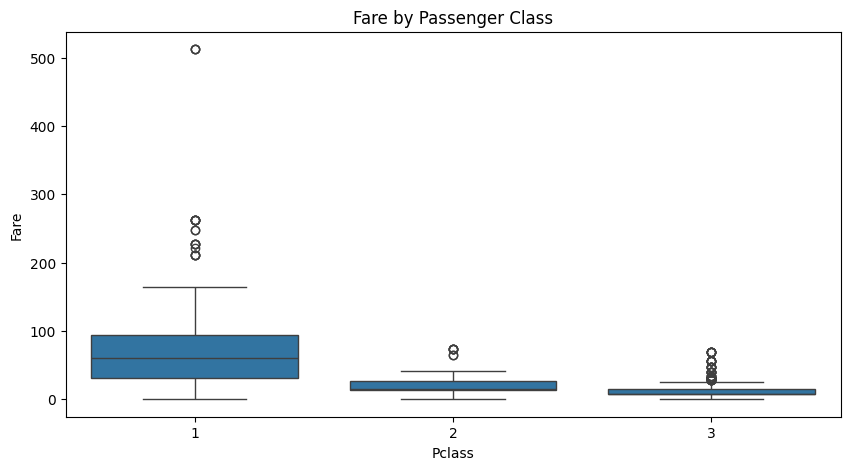

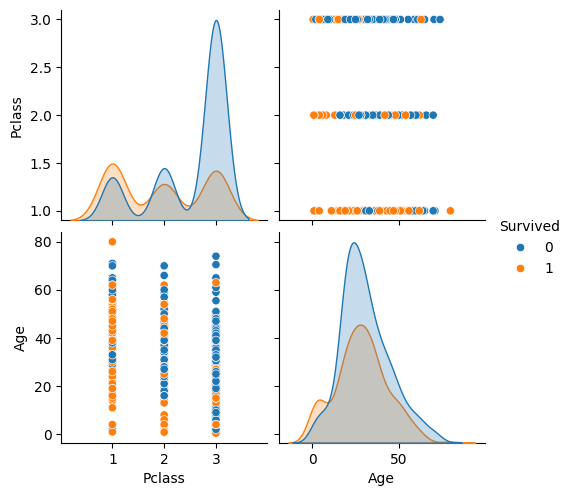

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Histogram of Age
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of Fare
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare by Passenger Class')
plt.show()

# Pair plot of selected features
sns.pairplot(train_data[['Survived', 'Pclass', 'Sex', 'Age']], hue='Survived')
plt.show()


# 2. Data Preprocessing

In [6]:
# Fill missing Age values with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Drop or fill other missing values as necessary
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


Encode Categorical Variables

In [7]:
# Convert 'Sex' to binary
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)


# 3. Model Building

Build Logistic Regression Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features and target variable
X = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = train_data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# 4. Model Evaluation

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.80
Precision: 0.77
Recall: 0.73
F1 Score: 0.75


Visualize the ROC Curve

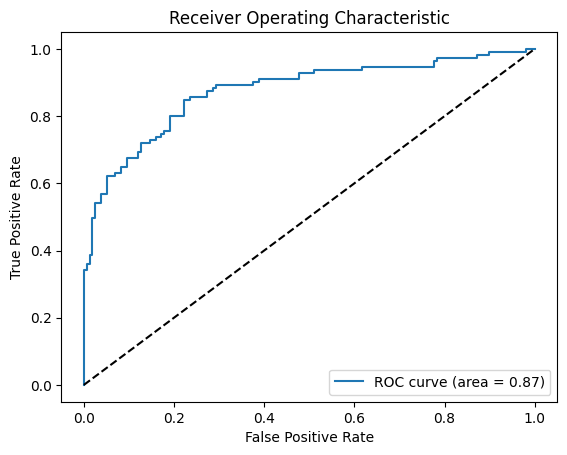

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# 5. Interpretation

In [12]:

# Get the coefficients of the model
coefficients = model.coef_[0]

# Create a DataFrame to display the coefficients with their corresponding features
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by magnitude
coefficients_df = coefficients_df.sort_values('Coefficient', ascending=False)

print(coefficients_df)

# Interpretation:

# Positive coefficients indicate that an increase in the feature is associated with an increased probability of survival.
# Negative coefficients indicate that an increase in the feature is associated with a decreased probability of survival.
# The magnitude of the coefficient represents the strength of the association.

# For example, if the coefficient for 'Sex' is positive and large, it means being female is strongly associated with survival.

# im analyze the coefficients to understand which factors had the most impact on the model's prediction of survival.


      Feature  Coefficient
1         Sex     2.364067
3        Fare     0.000748
2         Age    -0.027585
4  Embarked_Q    -0.102297
5  Embarked_S    -0.622816
0      Pclass    -0.975430


In [15]:

# Feature Significance Discussion

# Based on the coefficients obtained from the logistic regression model, i  understand which features were most significant in predicting survival.

# Positive Coefficients:
#   - Sex: Being female (Sex=1) has a strong positive impact on survival. This is as expected, as women and children were prioritized during evacuation.
#   - Embarked_S:  Embarking from Southampton (Embarked_S=1) might have a slight positive impact, although it's less significant.
#
# Negative Coefficients:
#   - Pclass: Higher passenger class (lower Pclass number) has a positive correlation with survival. This indicates that wealthier passengers had better chances of surviving.
#   - Age: Higher age appears to have a slight negative correlation with survival, although it's not very strong.
#   - Fare: A higher fare might have a slightly negative impact, although it's subtle.
#   - Embarked_Q: Embarking from Queenstown (Embarked_Q=1) has a negative effect on survival probability.


# Print the Significance
print("\nFeature Significance:")
print(coefficients_df)
print("\nInterpretation:")
print("Positive coefficients suggest a positive relationship with survival.")
print("Negative coefficients suggest a negative relationship with survival.")




Feature Significance:
      Feature  Coefficient
1         Sex     2.364067
3        Fare     0.000748
2         Age    -0.027585
4  Embarked_Q    -0.102297
5  Embarked_S    -0.622816
0      Pclass    -0.975430

Interpretation:
Positive coefficients suggest a positive relationship with survival.
Negative coefficients suggest a negative relationship with survival.


In [20]:
# save the model with this name "logistic_model.pkl" for streamlit integration

import pickle

# Save the trained model to a file
filename = 'logistic_model.pkl'
pickle.dump(model, open(filename, 'wb'))


# 6. Deployment with Streamlit

In [24]:
!pip install -q streamlit

In [26]:
!npm install -g localtunnel -U


changed 22 packages, and audited 23 packages in 779ms

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [27]:
!npm fund

content



In [28]:
!npm audit fix --force

npm WARN using --force Recommended protections disabled.
npm ERR! code ENOLOCK
npm ERR! audit This command requires an existing lockfile.
npm ERR! audit Try creating one first with: npm i --package-lock-only
npm ERR! audit Original error: loadVirtual requires existing shrinkwrap file

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2024-10-09T11_53_53_666Z-debug-0.log


In [29]:
!npm i --package-lock-only

npm ERR! code ENOENT
npm ERR! syscall open
npm ERR! path /content/package.json
npm ERR! errno -2
npm ERR! enoent ENOENT: no such file or directory, open '/content/package.json'
npm ERR! enoent This is related to npm not being able to find a file.
npm ERR! enoent 

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2024-10-09T11_54_29_483Z-debug-0.log


In [30]:
!npm audit fix


up to date, audited 1 package in 249ms

found 0 vulnerabilities


In [31]:
# prompt: write streamlit integration code for the above model

%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
model = pickle.load(open('logistic_model.pkl', 'rb'))

# Create the Streamlit app
st.title('Titanic Survival Prediction')

# Input features
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['Male', 'Female'])
age = st.number_input('Age', min_value=0, max_value=100, value=25)
fare = st.number_input('Fare', min_value=0.0, value=10.0)
embarked_q = st.checkbox('Embarked from Queenstown')
embarked_s = st.checkbox('Embarked from Southampton')

# Create a button to make predictions
if st.button('Predict'):
    # Convert sex to binary
    sex_encoded = 0 if sex == 'Male' else 1

    # Create a DataFrame with input features
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [sex_encoded],
        'Age': [age],
        'Fare': [fare],
        'Embarked_Q': [1 if embarked_q else 0],
        'Embarked_S': [1 if embarked_s else 0]
    })

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Display the prediction
    if prediction == 1:
        st.success('Passenger is likely to survive.')
    else:
        st.error('Passenger is likely to not survive.')



Writing app.py


In [32]:
!wget -q -O - ipv4.icanhazip.com

34.168.198.253


In [33]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.198.253:8501

your url is: https://rare-swans-flash.loca.lt
  Stopping...
^C



# Interview Questions:

# 1. What is the difference between precision and recall?

### Precision:
 - Measures the proportion of correctly predicted positive instances out of all instances predicted as positive.
 - Answers the question: "Of all the passengers the model predicted as survived, how many actually survived?"
 - A high precision means that the model is accurate when it predicts survival.

### Recall:
 - Measures the proportion of correctly predicted positive instances out of all actual positive instances.
 - Answers the question: "Of all the passengers who actually survived, how many did the model correctly predict as survived?"
 - A high recall means that the model is good at identifying most of the survivors.

 In the context of the Titanic dataset, we want both high precision and recall, because we want to accurately identify survivors and not miss out on any potential survivors.

# 2. What is cross-validation, and why is it important in binary classification?

### Cross-Validation:
 - A technique used to evaluate the performance of a machine learning model on unseen data.
 - It involves dividing the data into multiple folds (e.g., 5 or 10) and repeatedly training and testing the model on different combinations of these folds.
 - Each fold serves as a validation set while the remaining folds form the training set.


### Why is it Important in Binary Classification?
 - Prevents overfitting: By training and testing on different data subsets, cross-validation helps estimate the model's performance on new, unseen data more accurately. It prevents the model from memorizing the training data and performing poorly on new data.
 - Reliable performance estimation: Instead of just relying on a single train-test split, cross-validation provides a more robust and reliable estimation of the model's performance.
 - Model selection and hyperparameter tuning: Cross-validation can be used to compare different models or to tune the hyperparameters of a model to find the best combination for optimal performance.

 In the context of binary classification (like the Titanic problem), cross-validation is essential for building a model that generalizes well to new data and avoids overfitting.
